In [5]:
from google.colab import files
uploaded = files.upload()
print(uploaded)

Saving BIKE DETAILS.csv to BIKE DETAILS.csv
{'BIKE DETAILS.csv': b"name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price\r\nRoyal Enfield Classic 350,175000,2019,Individual,1st owner,350,\r\nHonda Dio,45000,2017,Individual,1st owner,5650,\r\nRoyal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114\r\nYamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643\r\nYamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,\r\nHonda CB Twister,18000,2010,Individual,1st owner,60000,53857\r\nHonda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719\r\nRoyal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,\r\nHero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,\r\nBajaj Discover 125,50000,2016,Individual,1st owner,42000,60122\r\nYamaha FZ16,35000,2015,Individual,1st owner,32000,78712\r\nHonda Navi,28000,2016,Individual,2nd owner,10000,47255\r\nBajaj Avenger Street 220,80000,2018,Individual,1st o

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('BIKE DETAILS.csv')

In [17]:
#Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
#first 10 rows.

df.head(10)

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0


In [18]:
df.shape

(1061, 7)

In [19]:
df.columns

Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')

In [20]:
#Question 2: Check for missing values in all columns and describe your approach for
#handling them.

df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


In [21]:
# for traeting missing values
df.dropna(inplace = True)

In [22]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,0


In [23]:
# another way
df.drop(columns=['ex_showroom_price'])

,name,selling_price,year,seller_type,owner,km_driven
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000
5,Honda CB Twister,18000,2010,Individual,1st owner,60000
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000
...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000
1057,Honda CB twister,16000,2012,Individual,1st owner,33000
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000


In [24]:
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,0


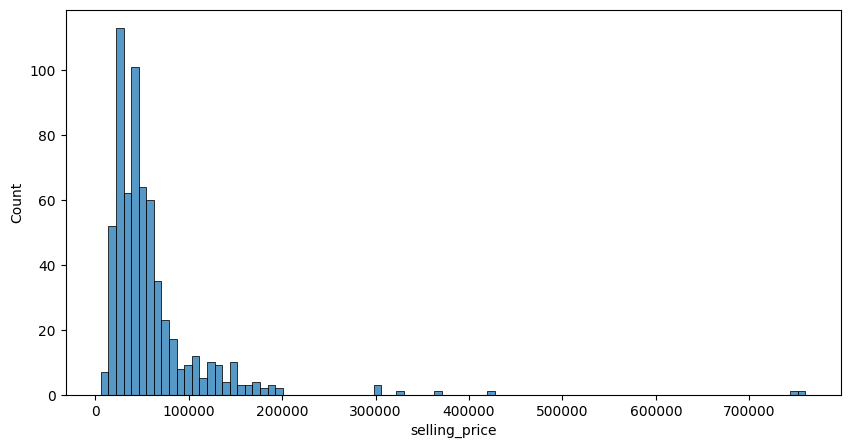

In [25]:
#Question 3: Plot the distribution of selling prices using a histogram and describe the
#overall trend.

plt.figure(figsize=(10,5))
sns.histplot(df['selling_price'])
plt.show()

In [ ]:
# insight >> The most number of bikes sold is with a selling price less than 100000

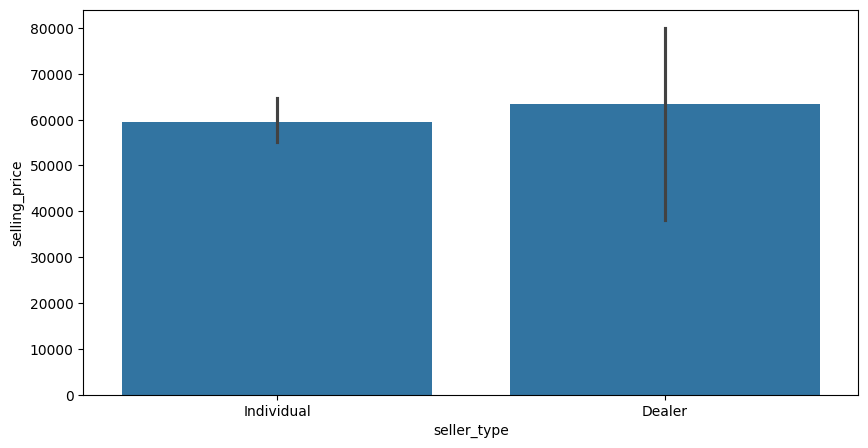

In [26]:
# Question 4: Create a bar plot to visualize the average selling price for each seller_type
# and write one observation.



plt.figure(figsize=(10,5))
sns.barplot(x ='seller_type',y ='selling_price',data = df)
plt.show()

In [ ]:
# insight >> dealer generally have a higher average selling price compared to individiual sellers

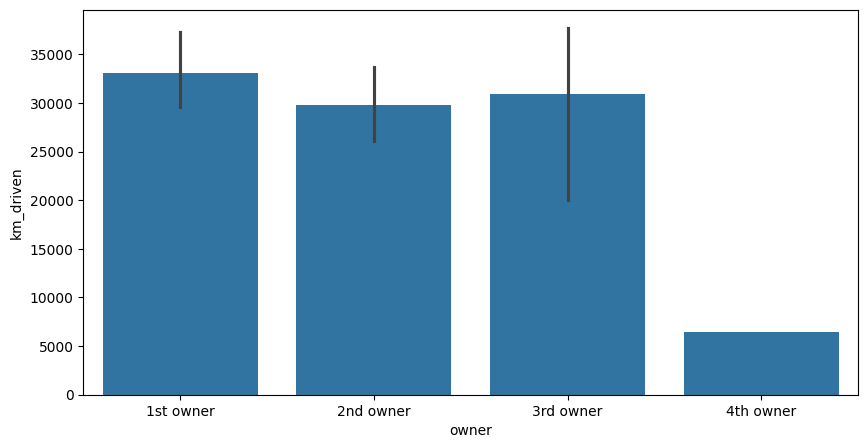

In [27]:
# Question 5: Compute the average km_driven for each ownership type (1st owner,
# 2nd owner, etc.), and present the result as a bar plot.

plt.figure(figsize = (10,5))
sns.barplot(x ='owner',y ='km_driven',data = df)
plt.show()

In [31]:
# Question 6: Use the IQR method to detect and remove outliers from the km_driven
# column. Show before-and-after summary statistics.

import pandas as pd

# Example: Load dataset
df = pd.read_csv("BIKE DETAILS.csv")

# Show basic info
print("Before removing outliers:")
print(df['km_driven'].describe())

# Step 1: Calculate Q1 and Q3
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)

# Step 2: Calculate IQR
IQR = Q3 - Q1

# Step 3: Define bounds
lower_bound = Q1 - 1 * IQR

# Step 4: Detect outliers
outliers = df[(df['km_driven'] < lower_bound) | (df['km_driven'] > upper_bound)]
print(f"\nNumber of outliers detected: {len(outliers)}")

# Step 5: Remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# Step 6: Compare summary statistics
print("\nAfter removing outliers:")
print(df_no_outliers['km_driven'].describe()).5 * IQR
upper_bound = Q3 + 1.5



SyntaxError: invalid syntax (ipython-input-3368716531.py, line 32)

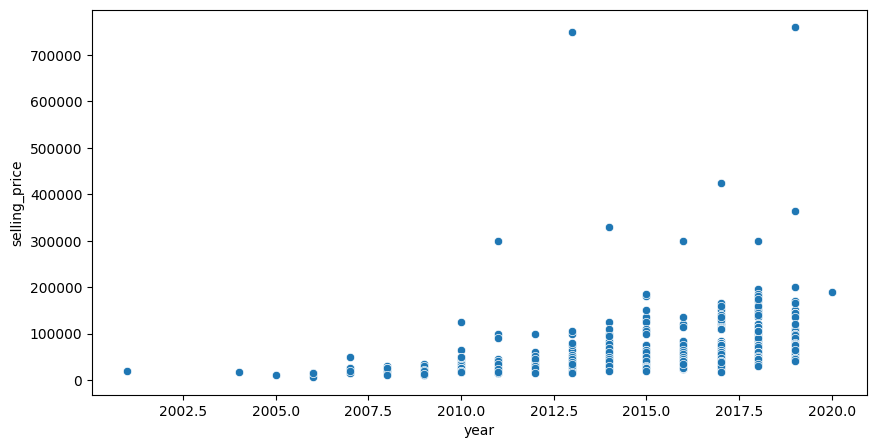

In [32]:
# Question 7: Create a scatter plot of year vs. selling_price to explore the
# relationship between a bike's age and its price.

plt.figure(figsize=(10,5))
sns.scatterplot(x='year',y ='selling_price',data = df)
plt.show()

In [33]:
# Question 8: Convert the seller_type column into numeric format using one-hot
# encoding. Display the first 5 rows of the resulting DataFrame.


# Show original column
print("Original 'seller_type' column:")
print(df['seller_type'].head())

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False)

# Display first 5 rows
print("\nDataFrame after one-hot encoding:")
print(df_encoded.head())

Original 'seller_type' column:
2    Individual
3    Individual
5    Individual
6    Individual
9    Individual
Name: seller_type, dtype: object

DataFrame after one-hot encoding:
                                  name  selling_price  year      owner  \
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
5                     Honda CB Twister          18000  2010  1st owner   
6                 Honda CB Hornet 160R          78500  2018  1st owner   
9                   Bajaj Discover 125          50000  2016  1st owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
5      60000            53857.0               False                    True  
6      17000            87719.0               False             

                   selling_price      year  km_driven  ex_showroom_price
selling_price           1.000000  0.350654  -0.194093           0.918583
year                    0.350654  1.000000  -0.329823           0.126378
km_driven              -0.194093 -0.329823   1.000000          -0.122011
ex_showroom_price       0.918583  0.126378  -0.122011           1.000000


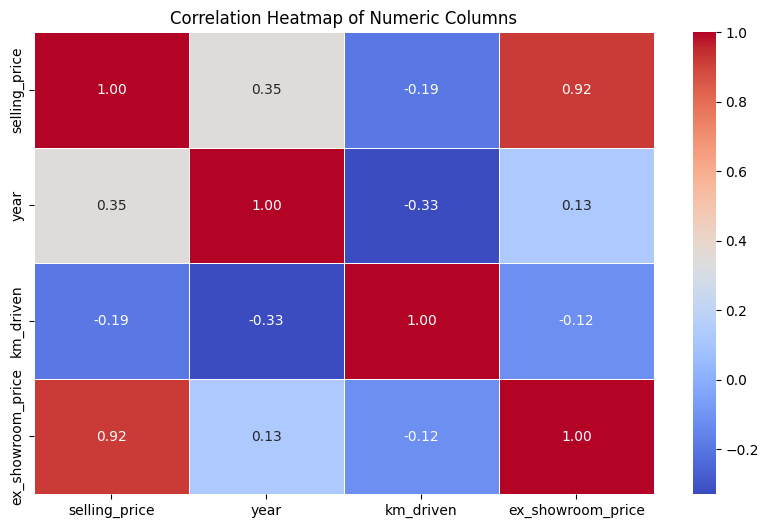

In [34]:
# Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
# What correlations stand out the most?

# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Display matrix
print(corr_matrix)

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

In [ ]:
# Question 10: Summarize your findings in a brief report:
# ● What are the most important factors affecting a bike's selling price?
# ● Mention any data cleaning or feature engineering you performed.

-> The most important factors affecting a bike's selling price are

1. km driven
2. engine capacity
3. Year of Manufacture
4. Brand & Fuel Type (if available)
5. Owner Type / Seller Type

-> the data cleaning performed is following :
   * Missing Values
   *Outlier Treatment
   *Data Type Fixing

-> the feature engineering performed is : one-hot encoding
     